# **IEOR 4404  Simulation (Spring 2020)**

**Homework 6 [Total points: 60]**


**Due 11:59 PM, April 20**

This fifth homework consists of application-oriented exercises focusing on three important topics:

(a) Generating samples from a mixture distribution using composition method 

(b) Generating an arrival process

(c) `simpy` basics


This third homework focuses on the inverse transform method for discrete distributions.

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [0]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [18]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
#we will need this for array operation
import numpy as np
#we will need this for plots
import matplotlib.pyplot as plt
#We will need this to calculate factorial on array
import scipy.misc as spm
#We will need this to do calculations related to distribution
import scipy.stats as spst

#We will need this to calculate factorial on array
import scipy.special as spsp
import scipy.special.lambertw as LambertW
#Sympy
import sympy 

#simpy
!pip install simpy
import simpy

#pynverse
!pip install pynverse
import pynverse

#Exercise 1 [50 Points]

In this exercise, we simulate different arriving processes. Generating the arrival times for different processes is extremely important when we move on to model more complicated systems.





##Q1.  [10 points]

Assume a process follows a homogeneous Poisson process with arrival rate $\lambda =5$. 


*  Without using loop or list comprehension, simulate the arrival times for the first 300 arrivals. Report the ordered arrival times
(The arrival times should be generated at once)
* Based on the sample distribution and theoretical distribution, show that the inter-arrival time follows an exponential distribution.



  
 
 

In [0]:
inter_a=-1/5*np.log(np.random.rand(300))
t=np.cumsum(inter_a)
t

array([ 0.14184109,  0.34026983,  0.58367309,  0.64452445,  0.65248587,
        1.16062962,  1.23058296,  1.46733098,  1.51741177,  1.67858124,
        2.18424857,  2.37002973,  2.72316595,  2.95698039,  3.04318288,
        3.49995612,  3.54883422,  3.66625015,  3.69338207,  3.82660469,
        3.85289411,  4.01169978,  4.0803417 ,  4.37623195,  4.47785978,
        4.48436299,  4.59863795,  4.91807974,  4.95822178,  5.0552679 ,
        5.39209695,  5.5407572 ,  5.63759786,  5.6388921 ,  6.20647343,
        6.2501487 ,  6.44630146,  6.59181614,  6.64791742,  6.77679097,
        6.83043171,  6.90999185,  6.93196983,  7.01803431,  7.02763589,
        7.33171064,  7.61442285,  7.66860474,  7.77316771,  8.17123158,
        8.73270448,  9.21571496,  9.55729191,  9.5680334 ,  9.94593257,
       10.00407365, 10.53917546, 10.75967126, 10.88083755, 11.03661071,
       11.12389732, 11.14659193, 11.15660474, 11.69518737, 11.70753054,
       11.88436684, 12.22540369, 12.45284435, 12.84130441, 13.38

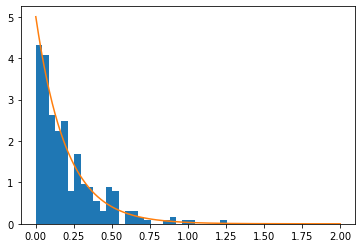

In [0]:
plt.hist(inter_a,density=True, bins=30)
lmbda=5
outcome=np.linspace(0,2,1000)
pdf=lmbda*np.exp(-lmbda*outcome)
plt.plot(outcome,pdf)
plt.show()

##Q2. [12 points]


Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=exp(-t^{0.5}+2t), 0\leq t<5$



* Use the **thinning method** to simulate the arrival process from t=0 to 5 one time. The generation of the proposals and the sampling should be done based on NumPy arrays. No loops or list comprehensions are allowed in this question. [Hint: Generate the arrivals from a homogeneous process at the same time, compute the acceptance rate of all the proposed arrivals at the same time, determine acceptance/rejection  of all the proposed arrivals at the same time]

* Report the number of arrivals for the simulation.

* Plot the sample distribution of the arrival times. 


In [0]:
time=np.linspace(0,5,1000)
tmax=np.exp(-time**0.5+2*time)
tmax=np.max(tmax)

inter_a=-1/tmax*np.log(np.random.rand(50000))
t=np.cumsum(inter_a)
test=np.random.rand(50000)
t=t[(t<5) * (test<(np.exp(-t**0.5+2*t)/tmax))]

In [0]:
len(t)

1298

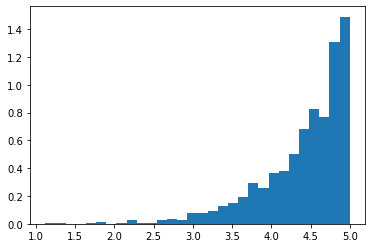

In [0]:
plt.hist(t,bins=30,density=True)
plt.show()

##Q3.  [14 points]

Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=100* t* exp(t^{2})$


* Use the **inversion method** to simulate the arrival process for the first 2000 arrivals for one time. No loop or list comprehension is allowed. Need to be based on NumPy array operation. [hint: you need to generate the arrival times at the same time and do the inversions at the same time]

* Plot the distribution of the **inter-arrival** times.

* Plot the sample distribution of the expected number of arrivals between 0 and $t_1$, between $t_1$ and $t_2$, between $t_2$ and $t_3$, $\dots$, $t_{1999}$ and $t_{2000}$, where $t_i$ is the arrival time of $i$th arrival of the simulated nonhomogenous process. In the same plot, plot the corresponding theoretical distribution. 

In [0]:
t=sympy.Symbol("t")
F1=sympy.integrate(100*t*sympy.exp(t**2),(t,0,t))
a=sympy.Symbol("a")
sympy.solve(F1-a,t)[1]
Lambda_t=sympy.lambdify(t ,F1)


t_h= -np.log(np.random.rand(2000))
th=np.cumsum(t_h)
t_n=pynverse.inversefunc(Lambda_t,th)
t_n=np.sort(t_n)

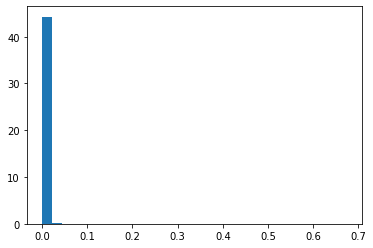

In [37]:
inter=np.diff(t_n)
plt.hist(inter,density=True, bins=30)
plt.show()

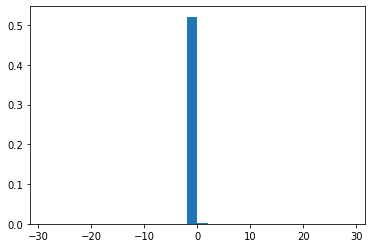

In [38]:
inter=inter.tolist()
outcome=[]
for i in range(len(inter)-1):
  F1=sympy.integrate(100*t*sympy.exp(t**2),(t,inter[i],inter[i+1]))
  Lambda_t=sympy.lambdify(t ,F1)
  outcome.append(Lambda_t(t))
outcome=np.array(outcome)
plt.hist(outcome, density=True, bins=30)
plt.show()

##Q4.  [14 points]


Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=100*t* exp(t^{2})$


* Use **ordered statistics method** to simulate the arrival process from t=0 to 2. 

* Report the number of arrivals for the simulation.</font> 

* Plot the sample distribution of the arrival times.

* Plot the theoretical distribution of the arrival times.

In [0]:
t=sympy.Symbol("t")
u=sympy.Symbol("u")
def Ex_arrivals(T):
  return float(sympy.integrate(100*t*sympy.exp(t**2),(t,0,T)))
def N_arrivals(T):
    return  np.random.poisson(Ex_arrivals(T))
def sympy_invcdf(T):
    CDF=sympy.integrate(100*t*sympy.exp(t**2)/Ex_arrivals(T),(t,0,t))
    inv_cdf=sympy.solve(CDF-u,t)
    evaluation=np.array([i.subs({u:0.5}) for i in inv_cdf])
    index=np.arange(len(evaluation))[evaluation>0]
    return  inv_cdf[index[0]]
def Simulate(T):
    N=N_arrivals(T)
    F1=sympy.lambdify(u,sympy_invcdf(T))
    return  np.sort(F1(np.random.rand(N)))
result_simulation = Simulate(T = 2)
result_simulation


array([0.05879803, 0.19358266, 0.19657056, ..., 1.99984083, 1.99985057,
       1.99996521])

In [0]:
print(len(result_simulation))

2706


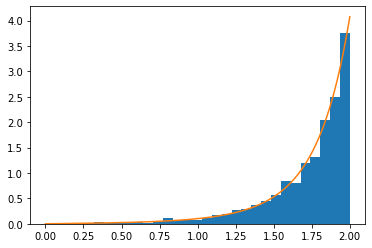

In [0]:
plt.hist(result_simulation,density=True, bins=30)

outcome=np.linspace(0,2,1000)
lmbda=100*outcome*np.exp(outcome**2)
pdf=lmbda/Ex_arrivals(2)
plt.plot(outcome,pdf)
plt.show()

# Exercise 2 [10 Points]

Let's model the arrival of two types of customers arriving at a store. Type 1 customers arrive following a Poisson process with ($\lambda=2$). Type 2 customers arrive following a Poisson process with ($\lambda=4$).



## Q1. [10 points]
* Simulate the system using `simpy` until T=2. Print out the arrival time of each customer and which type this customer is. 
> * During the simulation, please generate the inter-arrival times one by one for each process.
> * Define the arrival of type 1 customers as Process 1
> * Define the arrival of type 2 customers as Process 2
* Try out and see what will happen if you forgot to add `yield` before env.timeout() for the Type 2 process. Describe what you find and explain why this happens.

In [0]:
def Process1():
  lmbda=2
  while True:
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    print("Type1 1 arrives at,",env.now)

def Process2():
  lmbda=4
  while True:
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    print("Type1 2 arrives at",env.now)

 
env=simpy.Environment()
env.process(Process1())
env.process(Process2())

T=2
env.run(until=T)

Type1 2 arrives at 0.05933382092323207
Type1 2 arrives at 0.2775324081030795
Type1 2 arrives at 0.42095008601521844
Type1 2 arrives at 0.5957262674091546
Type1 1 arrives at, 0.659470702507599
Type1 1 arrives at, 0.692670742928664
Type1 2 arrives at 0.839500455563212
Type1 2 arrives at 0.8471133540902208
Type1 2 arrives at 0.9122888347735197
Type1 2 arrives at 1.044331961135128
Type1 1 arrives at, 1.0893477929050148
Type1 2 arrives at 1.1953381125788534
Type1 2 arrives at 1.466098472753756
Type1 2 arrives at 1.6430725822258656


In [17]:
def Process1():
  lmbda=2
  while True:
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    print("Type1 1 arrives at,",env.now)

def Process2():
  lmbda=4
  while True:
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    print("Type1 2 arrives at",env.now)

 
env=simpy.Environment()
env.process(Process1())
env.process(Process2())

T=2
env.run(until=T)

流式输出内容被截断，只能显示最后 5000 行内容。
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2 arrives at 0
Type1 2

In [0]:
#Type 2 is not processed, so the time always 0